In [3]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

path = ""
data_train = pd.read_csv(path + "train.csv")
data_train.head()
data_train.shape



(14999, 9)

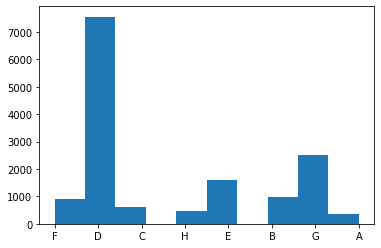

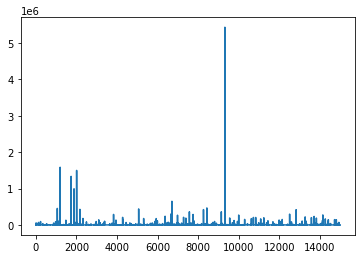

In [4]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

data_train = data_train[data_train["adview"] <2000000]

In [5]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [6]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

import datetime
import time

In [7]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.25618694991317975

In [8]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
 prediction = model_name.predict(X_test)
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3718.974061923116
Mean Squared Error: 835886630.8152658
Root Mean Squared Error: 28911.70404551184


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3718.974061923116
Mean Squared Error: 835886630.8152658
Root Mean Squared Error: 28911.70404551184


In [9]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 2322.688866120219
Mean Squared Error: 759158742.0474727
Root Mean Squared Error: 27552.83546293326


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Mean Absolute Error: 3291.0798778416115
Mean Squared Error: 460693822.85890675
Root Mean Squared Error: 21463.779323756262


In [10]:
import keras
from keras.layers import Dense
import tensorflow as tf

ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767404928.0000 - mean_squared_error: 767404928.0000
Epoch 2/100
366/366 [==============================] - 1s 1ms/step - loss: 767392384.0000 - mean_squared_error: 767392384.0000
Epoch 3/100
366/366 [==============================] - 1s 1ms/step - loss: 767363648.0000 - mean_squared_error: 767363648.0000
Epoch 4/100
366/366 [==============================] - 1s 1ms/step - loss: 767321984.0000 - mean_squared_error: 767321984.0000
Epoch 5/100
366/366 [==============================] - 1s 1ms/step - loss: 767261632.0000 - mean_squared_error: 767261632.0000
Epoch 6/100
366/366 [==============================] - 1s 1ms/step - loss: 767181568.0000 - mean_squared_error: 767181568.0000
Epoch 7/100
366/366 [==============================] - 1s 1ms/step - loss: 767081984.0000 - mean_squared_error: 767081984.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 766962432.0000 - mean_squared_error:

In [12]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

ann.save("ann_youtubeadview.h5")

##Testing the model

In [14]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#importing the datasets
data_test = pd.read_csv("test.csv")

#Displaying the imported dataset
data_test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [15]:
#describing the dataset
data_test.describe

<bound method NDFrame.describe of           vidid    views likes dislikes comment   published    duration  \
0      VID_1054   440238  6153      218    1377  2017-02-18     PT7M29S   
1     VID_18629  1040132  8171      340    1047  2016-06-28     PT6M29S   
2     VID_13967    28534    31       11       1  2014-03-10    PT37M54S   
3     VID_19442  1316715  2284      250     274  2010-06-05     PT9M55S   
4       VID_770  1893173  2519      225     116  2016-09-03      PT3M8S   
...         ...      ...   ...      ...     ...         ...         ...   
8759   VID_2944   111205   471       14     101  2011-04-19     PT3M14S   
8760   VID_8195  1074457  1024      195      65  2016-06-03  PT2H18M35S   
8761  VID_18973  1891692  4606     1109     191  2016-06-26     PT7M14S   
8762   VID_5849   714859  1639      151     382  2016-03-23     PT3M15S   
8763   VID_8494     5297    12        1       0  2016-12-19    PT10M14S   

     category  
0           B  
1           F  
2           D  
3

In [17]:
#removing chharacter "F" present in data
data_test = data_test[data_test.views != 'F']
data_test = data_test[data_test.likes != 'F']
data_test = data_test[data_test.dislikes != 'F']
data_test = data_test[data_test.comment != 'F']

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [18]:
#Assigning each category a number for category feature
category = {'A':1 , 'B':2 , 'C':3 , 'D':4 , 'E':5 , 'F':6 , 'G':7 , 'H':8}
data_test["category"] = data_test["category"].map(category)

#Dataset after cleaning and categorizing the features
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [19]:
#Converting all floating point numbers to integers for views, likes, comments, dislikes, and adviews

data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

column_vidid = data_test["vidid"]

In [20]:
#Encoding features like category, duration and vidid

from sklearn.preprocessing import LabelEncoder
data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [21]:
#Converting Time_in_sec for duration
import datetime
import time

#defining a functionc"checki" to check the duration of the adds
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  p = ['H' , 'M' , 'S']
  
  for i in y:
    if i not in p:
      mm+=i
    else:
      if (i == "H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  
  if (h == ''):
    h = '00'
  if (m == ''):
    m = '00'
  if (s == ''):
    s = '00'

  bp = h+':'+m+':'+s
  return bp

In [22]:
#reloading the csv file to the project and assiging it to train
test = pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]

#applying the "checki" function to the csv file
time = mp.apply(checki)

#defining a function "func_sec" to transform the time into seconds
def func_sec(time_string):
  h, m, s =time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

#calling the function "func_sec" and applying to the above function variable _time_
time1 = time.apply(func_sec)

#applying the above all functions to the the dataset ("data_train")
data_test["duration"] = time1

#displaying the newly modified dataset
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [23]:
data_test = data_test.drop(["vidid"] , axis = 1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( data_train , Y_train , test_size = 0.2 , random_state = 42)

In [25]:
x_test

,views,likes,dislikes,comment,published,duration,category
4912,630898,1625,117,80,370,2887,4
4921,384,2,0,0,2047,373,5
3813,36772,138,4,7,1281,357,2
9091,73482,74,21,4,345,1175,4
8485,86827,257,5,128,1999,2967,4
...,...,...,...,...,...,...,...
3788,40389,250,7,9,2230,2265,4
4993,127443,61,10,0,501,1871,4
6953,85311,25,12,1,599,2874,5
769,67541,691,19,66,2130,2865,4
